# Homework 3

### Due: Thursday Oct 5, at 11:59pm via Blackboard

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Problem 1: Peformance of Large vs. Small Companies

Companies vary greatly in size. This variation can hide how well a company is performing. Rather than looking at the raw profit numbers, analysts consider financial ratios that adjust for the size of the company. A popular ratio is the return on assets, defined as:

**Return on Assets $= Net Income/Total Assets$**

Net income is another name for profits, and the total assets of a company is the value of everything it owns that is used to produce profits. The return on assets indicates how much profit the company generates relative to the amount that it invested to make that profit. A company with losses rather than profits has a negative return on assets. 

**Data:** The data set `Company.csv` gives the company name, total assets (in Millions \$), net income (in Millions \$), and the number of employees reported by 167 retailers in the United States. 

In the following questions, you will be performing an **exploratory data analysis (EDA)** for the given companies data. 

In [3]:
company = pd.read_csv("Company.csv")
company.shape

(167, 4)

In [5]:
company.head()

,Company Name,Total Assets (M$),Net Income (M$),# Employees
0,1-800-FLOWERS.COM,256,-4,2200
1,99 CENTS ONLY STORES,824,74,12000
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710
3,ABERCROMBIE & FITCH -CL A,2948,150,85000
4,ADVANCE AUTO PARTS INC,3354,346,51017


### 1.1. (2 points) Compute and report (in a short paragraph of text) the following summary statistics for the `Net Income (M\$)` data (round your values to the nearest integer):

    - Mean
    - Median
    - Standard Deviation
    - Range
    - IQR 

In [6]:
mean = round(company["Net Income (M$)"].mean())
mean

334

In [14]:
median = round(company["Net Income (M$)"].median())
median

34

In [15]:
stdev = round(company["Net Income (M$)"].std())
stdev 

1385

In [17]:
range = round(company["Net Income (M$)"].max() - company["Net Income (M$)"].min())
range

17899

In [18]:
IQR = round(company["Net Income (M$)"].quantile(0.75) - company["Net Income (M$)"].quantile(0.25))
IQR 

188

The companies in the dataset has has an average of around $334M, plus or minus $1385M. 
The range of net income is on the higher end, with a value of $17,899M, which might be due to outliers.  
The middle net income is $188M. The mean of net income is larger than the median value of total asset, $34M, which means the distribution is right-skewed. 

### 1.2. (2 points) Report the % of companies that inccured losses. For this question, you are expected to add a new categorical variable to the dataset (call it `Profit`) with two levels: `PROFIT` if the net income is above zero (net income >= 0) and `LOSS` if the net income is below zero (net income < 0). 


In [5]:
company["Profit"] = ["PROFIT" if netIncome>=0 else "LOSS" for netIncome in company["Net Income (M$)"]]
company ["Profit"].value_counts(normalize=True)

Profit
PROFIT    0.766467
LOSS      0.233533
Name: proportion, dtype: float64

### 1.3. (2 points) What is the shape of the distribution of the variable `Net Income (M$)`? For this question, you are expected to create **both** a histogram and a boxplot, and comment about the shape of the distribution and if there are any companies with an outlier net income.

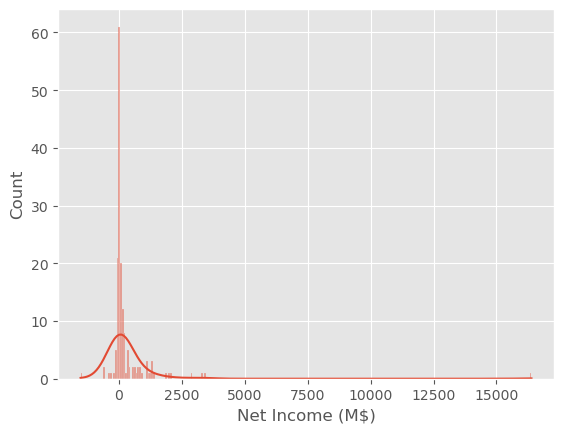

In [6]:
sns.histplot(company["Net Income (M$)"], kde=True)
plt.xlabel("Net Income (M$)")
plt.ylabel("Count")
plt.show()

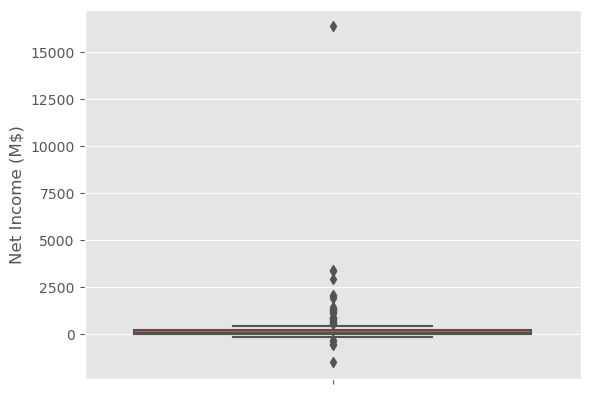

In [7]:
sns.boxplot(y=company["Net Income (M$)"])
plt.ylabel("Net Income (M$)")
plt.show()

In [ ]:
The distribution is right-skewed. There are a few companies with an outlier net income, as seen in the box plot. 

### 1.4. (2 points) A company that has more than 5000 employees is considered a large one, otherwise it is cosidered small. Create a new categroical variable (call it `Company Size`) with two levels: `LARGE` if the number of employees is greater than 5000 (employees > 5000), and `SMALL` otherwise (employees <=5000). What is the % of large and small companies in the dataset?

In [8]:
company["Company Size"] = ["LARGE" if employees>5000 else "SMALL" for employees in company["# Employees"]]
company ["Company Size"].value_counts(normalize=True)

Company Size
LARGE    0.688623
SMALL    0.311377
Name: proportion, dtype: float64

### 1.5. (2 points) Create a side-by-side boxplot to compare the distribtution of `Net Income (M$)` for both Large and Small companies. What does this graph tell you about the net income for both types of companies?

Text(0, 0.5, 'Net Income (M$)')

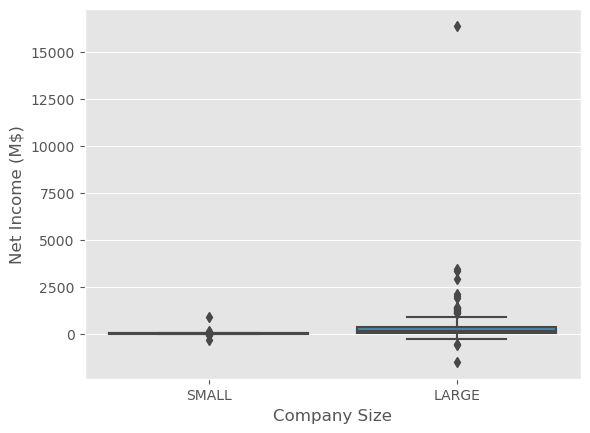

In [9]:
sns.boxplot(x="Company Size", y="Net Income (M$)", data=company)
plt.xlabel("Company Size")
plt.ylabel("Net Income (M$)")

### 1.6. (3 points) A better way to assess the performance of companies is to look at their `Return on Assets` instead of looking only at net income. The return on assets indicates how much profit the company generates relative to the amount that it invested to make profits. 

- Create a new numerical variable (call it `Return on Assets`) based on the formula: **Return on Assets = Net Income/Total Assets**. 

- What is the shape of the distribution of the variable `Return on Assets`? For this question, you are expected to create **both** a histogram and a boxplot, and comment about the shape of the distribution and if there are any companies with an outlier return on assets value.

- Create a side-by-side boxplot to compare the distribtution of `Return on Assets` for both Large and Small companies. What does this graph tell you about the return on assets for both types of companies?

In [10]:
company["Return on Assets"] = company["Net Income (M$)"] / company["Total Assets (M$)"]

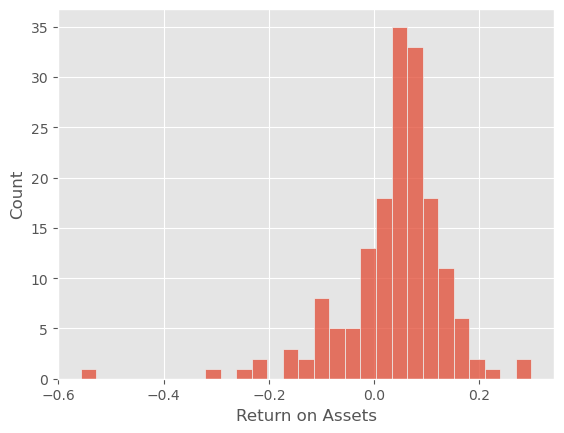

In [11]:
sns.histplot(company["Return on Assets"])
plt.xlabel("Return on Assets")
plt.ylabel("Count")
plt.show()

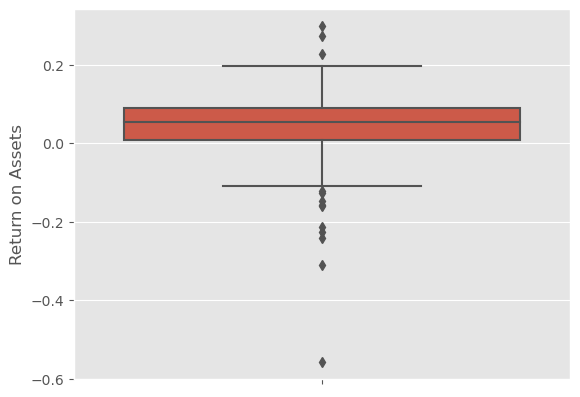

In [12]:
sns.boxplot(y="Return on Assets", data=company)
plt.ylabel("Return on Assets")
plt.show()

In [ ]:
The distribution is left-skewed. There are companies with an outlier return on assets value as indicated by 
the symbols past the whiskers. 

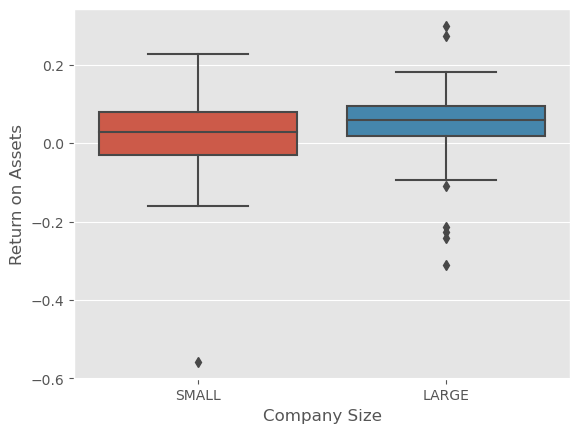

In [13]:
sns.boxplot(x="Company Size", y="Return on Assets", data=company)
plt.xlabel("Company Size")
plt.ylabel("Return on Assets")
plt.show()

### 1.7. (1 point) Which company has the least return on assets?

In [14]:
company.sort_values(by="Return on Assets", ascending=True).head(1)


,Company Name,Total Assets (M$),Net Income (M$),# Employees,Profit,Company Size,Return on Assets
123,SCHOOL SPECIALTY INC,638,-356,1919,LOSS,SMALL,-0.557994


## Problem 2: Data Analytics Jobs in the USA

Soon you will start getting ready to explore the job market for data analyst/data scientist positions (internship and full time). In this case study, we will assess the job market in the USA, and in particular, we are interested to learn which business sectors and companies are looking to hire data analysts in different US states. This should get you started with your internship search for Summer 2022.

The data set (`DataAnalyst.csv`) is available for download from blackboard. It is scrapped and cleaned from GlassDoor using this [web scrapper](https://github.com/picklesueat/data_jobs_data/blob/master/glass_scraper.py). We will learn how to scrap data from the web in the second half of the semester.

The dataset has a sample of 2,253 job listings. The following table describes some of the variables necessary to answer the questions in this quiz:

|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`Job Title`| listing's job title
|`Job Description`| listing's job description
|`Rating`| the company's rating on Glassdoor
|`Company Name` | the listing company's name
|`City` | city location of the company 
|`State`| state location of the company
|`Size` | number of employees in the company 
|`Founded`| the year the company was founded
|`Type of ownership`| is the company private, public, non-profit, etc.?
|`Industry`| primary business activity 
|`Sector`| economic sector classification for the company
|`Revenue`| company's income generated from business operations
|`Competitors`| the company's list of competitors
|`Min_Salary`| the minimum salary listing for the position
|`Max_Salary`| the maximum salary listing for the position

**In this homework, we assume that the sample of 2,253 job listings is a representative of the population of job listings in the USA.**

### 2.1 (1 point) What are the top 4 sectors with the highest count of job listings?

In [3]:
data = pd.read_csv("DataAnalyst.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Job Description    2253 non-null   object 
 2   Rating             1981 non-null   float64
 3   Company Name       2252 non-null   object 
 4   City               2253 non-null   object 
 5   State              2253 non-null   object 
 6   Size               2090 non-null   object 
 7   Founded            1593 non-null   float64
 8   Type of ownership  2090 non-null   object 
 9   Industry           1900 non-null   object 
 10  Sector             1900 non-null   object 
 11  Revenue            2090 non-null   object 
 12  Competitors        521 non-null    object 
 13  Min_Salary         2253 non-null   int64  
 14  Max_Salary         2253 non-null   int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 264.2+ KB


In [4]:
sectors = data["Sector"].value_counts()
topSectors = sectors.head(4)
topSectors

Sector
Information Technology    570
Business Services         524
Finance                   169
Health Care               151
Name: count, dtype: int64

### 2.2. (1 point) Suppose that you want to focus your job search in the following sectors (Information Technology, Business Services, Finance,  Health Care). Create a subset of the given dataset that include only these 4 sectors with their data (include all variables).

*Name the subset dataframe `mydata`.*

In [8]:
mydata = data[data["Sector"].isin(["Information Technology", "Business Services", "Finance", "Health Care"])]
pd.unique(mydata["Sector"])

array(['Health Care', 'Information Technology', 'Finance',
       'Business Services'], dtype=object)

### 2.3 (2 points) You are given the range of salary for each job listing (minimum and maximum salary). Add a new variable to `mydata` to estimate the salary of the for each of the listing in the dataset. The estimate salary is the average of the given minimum and maximum salary.

*Name the the new column `Est_Salary`.*

What is the **average**, and **standard deviation** for the estimated salary among the 4 sectors listed in `mydata` dataframe?

In [78]:
mydata = mydata.copy()
mydata["Est_Salary"] = (mydata["Max_Salary"] + mydata["Min_Salary"]) / 2

In [83]:
mydata.groupby("Sector")["Est_Salary"].agg(["mean","std"])

,mean,std
Sector,,
Business Services,72.135496,22.411196
Finance,67.644970,22.545747
Health Care,72.807947,26.554150
Information Technology,74.247368,25.520887


### 2.4 (2 points) Create a side-by-side boxplot to show the distribution of salaries among the four hiring sectors (listed in `mydata`). What does the boxplot tell you about the salaries in these industries for data analysts?

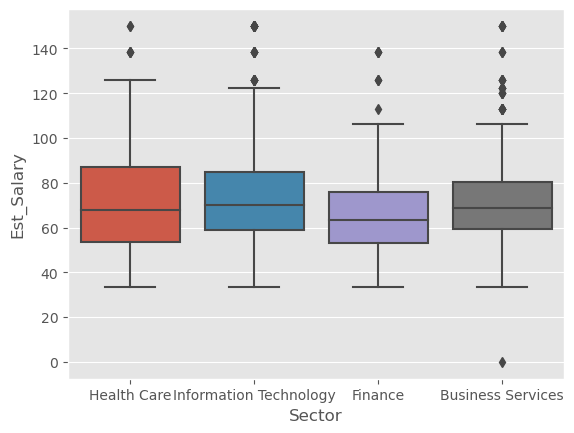

In [18]:
sns.boxplot(x="Sector", y="Est_Salary", data=mydata)
plt.show()

In [ ]:
These salaries are right-skewed, as you can see by the outliers which are at the top of the graph. 

### 2.5 (2 points) List the company names (distinct) in the **Information Technology** sector has job postings with estimated salaries above 100K dollars?

In [84]:
above = mydata[(mydata["Sector"] == "Information Technology") & (mydata["Est_Salary"] > 100)]
tech = above["Company Name"].unique()
tech

array(['Criteo', 'Tekfortune Inc.', 'Staffigo Technical Services, LLC',
       '8K Miles Software Services, Inc.', 'VTS',
       'RMS Computer Corporation', 'Reliable Software Resources',
       'Oracle', 'Avani Technology Solutions', 'Primesoft',
       'Systemart LLC', 'TechProjects', 'Information Technology Partners',
       'TikTok', 'Synchronous Solutions, Inc', 'HR Pundits',
       'Softpath System LLC', 'Motorola Solutions', 'Capgemini', 'NVIDIA',
       'Risk Management Solutions (RMS)', 'LeanData', 'Alteryx',
       'L&T Infotech', 'IntraEdge', 'Joomag, Inc.', 'Moveworks', 'Ursus',
       'Nuro', 'TalentBurst, Inc.', 'BayOne Solutions', 'Logic Planet',
       'Netflix', 'Diverse Lynx', 'Adwait Algorithm', 'Netflix, Inc.',
       'Apple', 'Collabera', 'Crystal Equation', 'Frontend Arts',
       'Poshmark', 'Zolon Tech Solutions Inc.', 'Lodestone', 'SAP',
       'Calsoft Labs', 'Coinbase', 'Trifacta', 'Wilbur Labs',
       'User Testing', 'Priceonomics', 'BOLD', 'Flatiron Health

### 2.6 (3 points) Use the dataset with the 4 sectors (`mydata`) to create a dot plot (lollipop plot) that shows the top 15 states with the highest average salaries.

*Name the dataframe `top15states`*

*The resulting dataframe should have two columns (`State`, `Avg Salary`), where `Avg Salary` is the mean salary in the corresponding `State`*

*Use two different colors of your choice to distingusih between the states with avegrage salary larger than \$75K and thos with average salary less than \$75K.* 

In [33]:
avgSalary = mydata.groupby("State")["Est_Salary"].mean()
avgSalary.sort_values(ascending=False).head(15).reset_index()
top15states

,State,Est_Salary
0,CA,90.986595
1,IL,78.027778
2,NJ,73.925000
3,CO,73.100000
4,NY,71.856195
5,AZ,70.771186
6,SC,70.250000
7,NC,67.849206
8,VA,65.074074
9,WA,62.545455


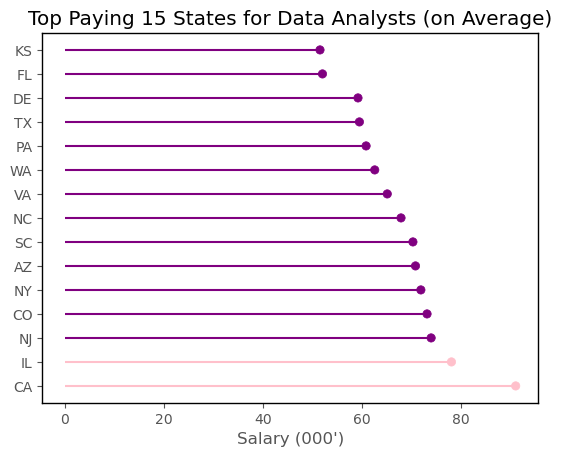

In [115]:
colors = ["pink" if salary > 75 else "purple" for salary in top15states["Est_Salary"]]
#toptop=top15states[top15states["Est_Salary"]>75]
#topdown=top15states[top15states["Est_Salary"]<75]

plt.scatter(top15states["Est_Salary"], top15states["State"], color=colors)
plt.hlines(y = top15states["Est_Salary"].index, xmin = 0, xmax=top15states["Est_Salary"], color=colors)
#plt.stem(topdown["State"], topdown["Est_Salary"], orientation="horizontal", basefmt=" ", linefmt="purple")
plt.gca().spines["top"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().set_facecolor("white")
plt.xlabel("Salary (000')")
plt.title("Top Paying 15 States for Data Analysts (on Average)")
plt.grid()
plt.show()